In [17]:
import cv2
import pytesseract
import numpy as np
import urllib
import requests
from PIL import Image
import matplotlib.pylab as plt
from datetime import datetime
import langdetect
from langdetect import detect_langs

#Declare pytessecart excuteable path
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Hassan\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

## Preprocessing for Tesseract
To avoid all the ways your tesseract output accuracy can drop, you need to make sure the image is appropriately pre-processed.

This includes rescaling, binarization, noise removal, deskewing, etc.



In [58]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image
    
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 5, h // 3)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [59]:
url='https://5.imimg.com/data5/QD/AF/NS/SELLER-28353478/school-id-card.jpg'
image = url_to_image(url)

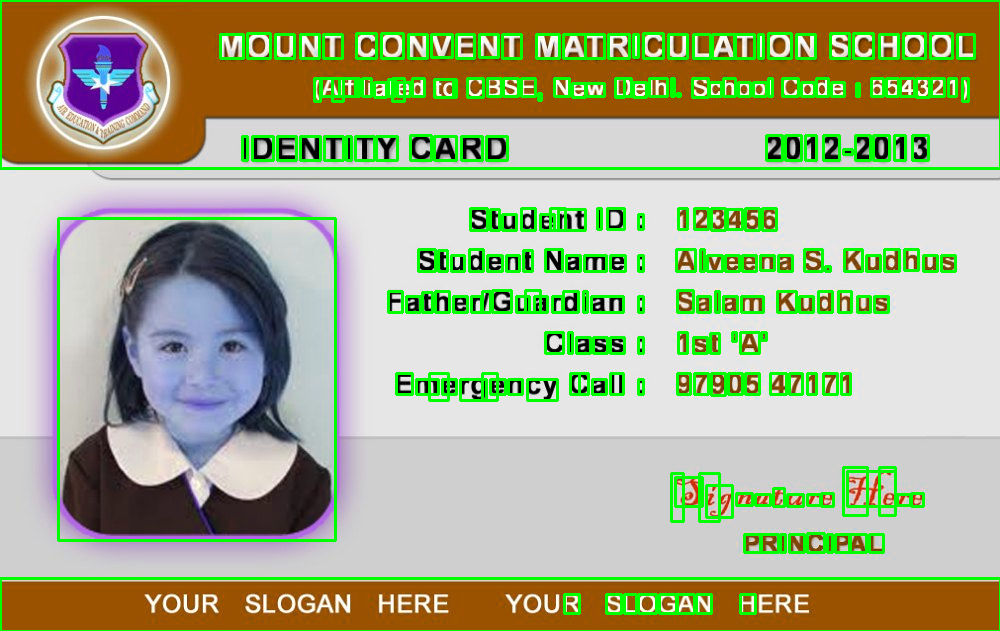

In [60]:
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])),(0, 255, 0), 2)
Image.fromarray(img)

(<Axes: title={'center': 'canny edge'}>,
 Text(0.5, 1.0, 'canny edge'))

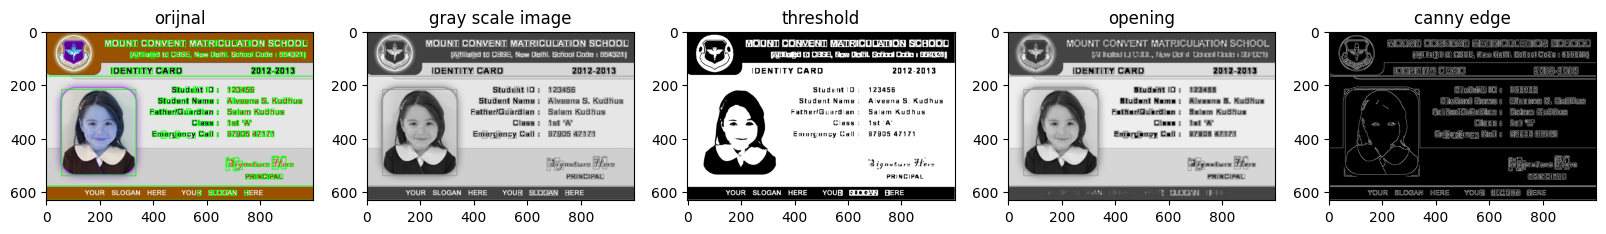

In [61]:
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
# skew = deskew(gray)

plt.figure(figsize=(20,20))
plt.subplot(151), plt.imshow(image, 'gray'), plt.title('orijnal')
plt.subplot(152), plt.imshow(gray, 'gray'), plt.title('gray scale image')
plt.subplot(153), plt.imshow(thresh, 'gray'), plt.title('threshold')
plt.subplot(154), plt.imshow(opening, 'gray'), plt.title('opening')
plt.subplot(155), plt.imshow(canny, 'gray'), plt.title('canny edge')
# plt.subplot(155), plt.imshow(skew, 'gray'), plt.title('skew correction')

![OCR Proess Flow](https://nanonets.com/blog/content/images/2019/11/ocr_flow.png?)

In [103]:
txt = pytesseract.image_to_data(image, lang='eng', output_type=pytesseract.Output.DATAFRAME)
display(txt.dropna())

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,0,0,1000,5,95.000000,
8,5,1,2,1,1,1,219,32,125,28,96.083984,MOUNT
9,5,1,2,1,1,2,355,32,168,28,95.076744,CONVENT
10,5,1,2,1,1,3,535,32,282,29,96.017494,MATRICULATION
11,5,1,2,1,1,4,829,32,147,28,95.963760,SCHOOL
13,5,1,2,1,2,1,47,38,110,83,32.194756,A+}
14,5,1,2,1,2,2,309,67,114,47,28.349197,(Alflialed
15,5,1,2,1,2,3,438,67,20,47,66.003815,t¢
16,5,1,2,1,2,4,473,67,75,47,96.105492,"CBSE,"
17,5,1,2,1,2,5,559,67,40,47,96.980675,New


In [104]:
txt = pytesseract.image_to_data(gray, lang='eng', output_type=pytesseract.Output.DATAFRAME)
display(txt.dropna())

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,219,32,125,28,88.852219,MOUNT
5,5,1,1,1,1,2,355,32,168,28,93.907318,CONVENT
6,5,1,1,1,1,3,535,32,282,28,81.161858,MATRICULATION
7,5,1,1,1,1,4,829,32,147,28,53.096699,SCHOOD
11,5,1,2,1,1,1,309,73,115,37,31.701668,(Aliliaied
12,5,1,2,1,1,2,435,73,26,37,75.286652,to
13,5,1,2,1,1,3,472,73,75,37,84.006927,"CBSE,"
14,5,1,2,1,1,4,561,73,41,37,93.287880,New
15,5,1,2,1,1,5,617,73,65,37,68.394455,Delhl.
16,5,1,2,1,1,6,697,73,78,37,89.351082,School


In [105]:
txt = pytesseract.image_to_data(thresh, lang='eng',output_type=pytesseract.Output.DATAFRAME)
display(txt.dropna())

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,219,32,125,28,94.029778,MOUNT
5,5,1,1,1,1,2,355,32,168,28,78.576088,CONVENT
6,5,1,1,1,1,3,535,32,282,28,37.906322,MANRICODANION
7,5,1,1,1,1,4,829,32,147,28,16.488419,SCHOO0
11,5,1,2,1,1,1,309,73,111,37,0.000000,(Aled
12,5,1,2,1,1,2,435,73,22,37,61.699234,£9
13,5,1,2,1,1,3,472,73,72,37,16.086166,"COBS8,"
14,5,1,2,1,1,4,558,73,44,37,86.580078,Sew
15,5,1,2,1,1,5,617,73,65,37,53.378090,Geil.
16,5,1,2,1,1,6,697,73,78,37,47.824421,Schoo!


In [106]:
txt = pytesseract.image_to_data(canny, lang='eng',output_type=pytesseract.Output.DATAFRAME)
display(txt.dropna())

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,8,0,990,6,95.000000,
8,5,1,2,1,1,1,73,28,879,7,95.000000,
12,5,1,3,1,1,1,248,29,704,5,95.000000,
16,5,1,4,1,1,1,69,28,883,8,95.000000,
20,5,1,5,1,1,1,71,28,881,8,95.000000,
24,5,1,6,1,1,1,218,32,127,29,48.356941,MOUNT
25,5,1,6,1,1,2,357,33,166,27,27.195953,CONTENT
26,5,1,6,1,1,3,537,32,280,29,23.314049,MAIRICULATON
27,5,1,6,1,1,4,828,32,149,29,0.000000,SCECCL
31,5,1,7,1,1,1,206,116,793,5,95.000000,


In [107]:
df = pytesseract.image_to_data(opening, lang='eng', output_type=pytesseract.Output.DATAFRAME)
display(txt.dropna())


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,8,0,990,6,95.000000,
8,5,1,2,1,1,1,73,28,879,7,95.000000,
12,5,1,3,1,1,1,248,29,704,5,95.000000,
16,5,1,4,1,1,1,69,28,883,8,95.000000,
20,5,1,5,1,1,1,71,28,881,8,95.000000,
24,5,1,6,1,1,1,218,32,127,29,48.356941,MOUNT
25,5,1,6,1,1,2,357,33,166,27,27.195953,CONTENT
26,5,1,6,1,1,3,537,32,280,29,23.314049,MAIRICULATON
27,5,1,6,1,1,4,828,32,149,29,0.000000,SCECCL
31,5,1,7,1,1,1,206,116,793,5,95.000000,
